In [6]:
pwd

u'/Users/Brook/Documents/GoogleDrive/Code/notebooks/adamant-squeegee/VWM_pilot'

In [7]:
cd ../../../

/Users/Brook/Documents/GoogleDrive/Code


In [8]:
cd ../../../

/Users/Brook


In [16]:
cd ../../

/


In [18]:
cd Volumes/BROOK\ S

/Volumes/BROOK S


In [20]:
cd pilot_data/data/

/Volumes/BROOK S/pilot_data/data


In [21]:
df002 = pd.read_csv('002_test1_2015_Dec_16_1736.csv', delimiter = ',')

In [22]:
df02 = pd.read_csv('02_test1_2015_Dec_16_1624.csv', delimiter = ',')

In [23]:
import psychopy

In [24]:
from psychopy import logging
logging.console.setLevel(logging.WARNING)
#overwrite (filemode='w') a detailed log of the last run in this dir
lastLog=logging.LogFile("lastRun.log", level=logging.INFO, filemode='w')
#also append warnings to a central log file
centralLog=logging.LogFile('04b_test1_2015_Dec_18_1708.log', level=logging.WARNING, filemode='a')

In [275]:
base1 = pd.read_csv('saccades/baseline01.csv')
base1 = base1.loc[base1['CURRENT_SAC_CONTAINS_BLINK'] == False]
base2 = pd.read_csv('saccades/baseline02.csv')
base2 = base2.loc[base2['CURRENT_SAC_CONTAINS_BLINK']== False]
alco1 = pd.read_csv('saccades/alcohol01.csv')
alco1 = alco1.loc[alco1['CURRENT_SAC_CONTAINS_BLINK']== False]
alco2 = pd.read_csv('saccades/alcohol2.csv')
alco2 = alco2.loc[alco2['CURRENT_SAC_CONTAINS_BLINK']== False]

In [276]:
groupedbase1 = base1.groupby(['TRIAL_INDEX'])
base1av = groupedbase1.mean()
base1av = base1av.reset_index()

groupedbase2 = base2.groupby(['TRIAL_INDEX'])
base2av = groupedbase2.mean()
base2av = base1av.reset_index()

groupedalco1 = alco1.groupby(['TRIAL_INDEX'])
alco1av = groupedalco1.mean()
alco1av = alco1av.reset_index()

groupedalco2 = alco2.groupby(['TRIAL_INDEX'])
alco2av = groupedalco2.mean()
alco2av = alco2av.reset_index()

base1av.insert(0,'task','type')
alco1av.insert(0,'task','type')

base2av.insert(0,'task','type')
alco2av.insert(0,'task','type')

base1av.ix[:48,:'task'] = '3'
base1av.ix[49:,:'task'] = '30'

alco1av.ix[:48,:'task'] = '30'
alco1av.ix[49:,:'task'] = '3'

base2av.ix[:48,:'task'] = '30'
base2av.ix[49:,:'task'] = '3'

alco2av.ix[:48,:'task'] = '3'
alco2av.ix[49:,:'task'] = '30'

In [277]:
base1av.insert(0,'id',1)
base1av.insert(1,'condition','baseline')
base2av.insert(0,'id',2)
base2av.insert(1,'condition','baseline')

alco1av.insert(0,'id',1)
alco1av.insert(1,'condition','alcohol')
alco2av.insert(0,'id',2)
alco2av.insert(1,'condition','alcohol')

In [279]:
main = pd.concat([base1av, alco1av, alco2av, alco2av], axis=0)


In [280]:
basemain = main.loc[main['condition']=='baseline']
alcomain = main.loc[main['condition']=='alcohol']

basemain3 = basemain.loc[basemain['task']=='3']
basemain30 = basemain.loc[basemain['task']=='30']

alcomain3 = alcomain.loc[alcomain['task']=='3']
alcomain30 = alcomain.loc[alcomain['task']=='30']


In [281]:
alcomain3.columns

Index(['id', 'condition', 'task', 'TRIAL_INDEX', 'CURRENT_SAC_ADJUSTED',
       'CURRENT_SAC_CONTAINS_BLINK', 'CURRENT_SAC_DURATION',
       'CURRENT_SAC_END_TIME', 'CURRENT_SAC_END_X_RESOLUTION',
       'CURRENT_SAC_END_Y_RESOLUTION', 'CURRENT_SAC_INDEX',
       'CURRENT_SAC_IS_RT_END', 'CURRENT_SAC_MSG_COUNT',
       'CURRENT_SAC_PEAK_VELOCITY', 'CURRENT_SAC_PEAK_VELOCITY_TIME',
       'CURRENT_SAC_START_TIME', 'CURRENT_SAC_START_X_RESOLUTION',
       'CURRENT_SAC_START_Y_RESOLUTION', 'IP_END_TIME', 'IP_START_TIME',
       'TRIAL_SACCADE_TOTAL', 'TRIAL_START_TIME'],
      dtype='object')

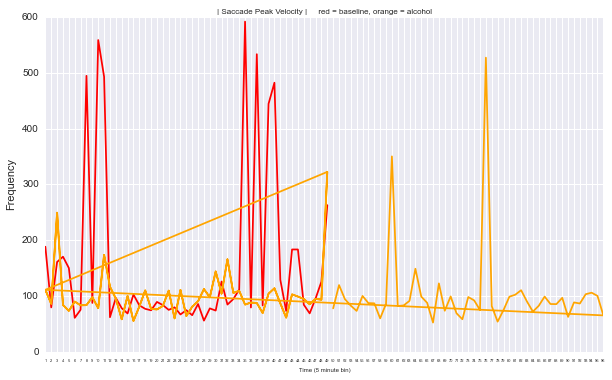

In [284]:
duration = plt.figure(figsize=(10.0,6.0))
plt.title('''| Saccade Peak Velocity |     red = baseline, orange = alcohol''',fontsize=8)
plt.xticks(base1av['TRIAL_INDEX'],fontsize=4)
plt.gca().set_color_cycle(['red', 'orange'])
plt.plot(basemain3.TRIAL_INDEX, basemain3.CURRENT_SAC_PEAK_VELOCITY)
plt.plot(alcomain3.TRIAL_INDEX, alcomain3.CURRENT_SAC_PEAK_VELOCITY)
plt.xlabel('Time (5 minute bin)',fontsize=6)
plt.ylabel('Frequency')
plt.show(duration)

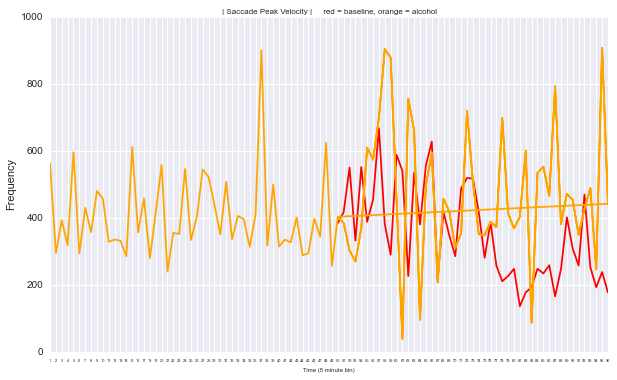

In [266]:
duration = plt.figure(figsize=(10.0,6.0))
plt.title('''| Saccade Peak Velocity |     red = baseline, orange = alcohol''',fontsize=8)
plt.xticks(base1av['TRIAL_INDEX'],fontsize=4)
plt.gca().set_color_cycle(['red', 'orange'])
plt.plot(basemain30.TRIAL_INDEX, basemain30.CURRENT_SAC_PEAK_VELOCITY)
plt.plot(alcomain30.TRIAL_INDEX, alcomain30.CURRENT_SAC_PEAK_VELOCITY)
plt.xlabel('Time (5 minute bin)',fontsize=6)
plt.ylabel('Frequency')
plt.show(duration)

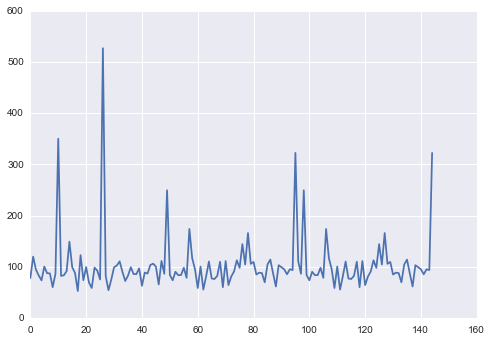

In [333]:
plt.plot(alcomain3.CURRENT_SAC_PEAK_VELOCITY)
#plt.plot(alcomain30.CURRENT_SAC_PEAK_VELOCITY)

#plt.plot(basemain3.CURRENT_SAC_PEAK_VELOCITY)
#plt.plot(basemain30.CURRENT_SAC_PEAK_VELOCITY)
#plt.plot(alcomain3.TRIAL_SACCADE_TOTAL)

#plt.plot(basemain30.TRIAL_INDEX, basemain30.TRIAL_SACCADE_TOTAL)

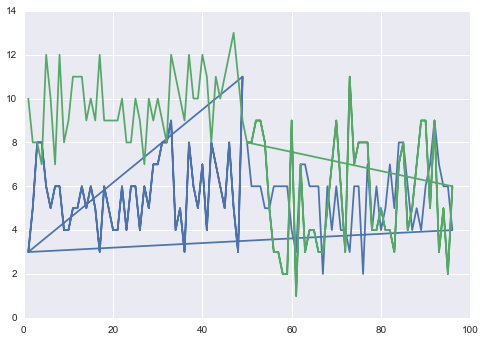

In [298]:
plt.plot(alcomain3.TRIAL_INDEX, alcomain3.TRIAL_SACCADE_TOTAL)
plt.plot(alcomain30.TRIAL_INDEX, alcomain30.TRIAL_SACCADE_TOTAL)